In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("D:\DATA SCIENCE\Dataset\diabetes.tsv",sep='\t')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [17]:
# Check Null data
data.isnull().any()

AGE    False
SEX    False
BMI    False
BP     False
S1     False
S2     False
S3     False
S4     False
S5     False
S6     False
Y      False
dtype: bool

<AxesSubplot:>

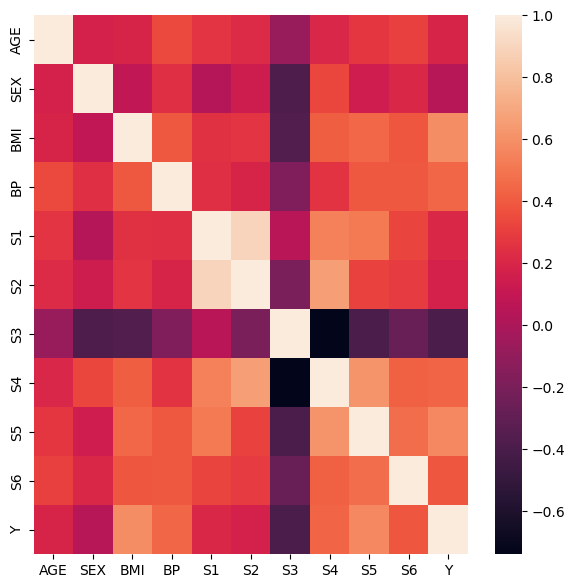

In [5]:
fig = plt.figure(figsize=(7,7))
cor = data.corr()
sns.heatmap(cor)
# data.corr

<AxesSubplot:xlabel='SEX', ylabel='BMI'>

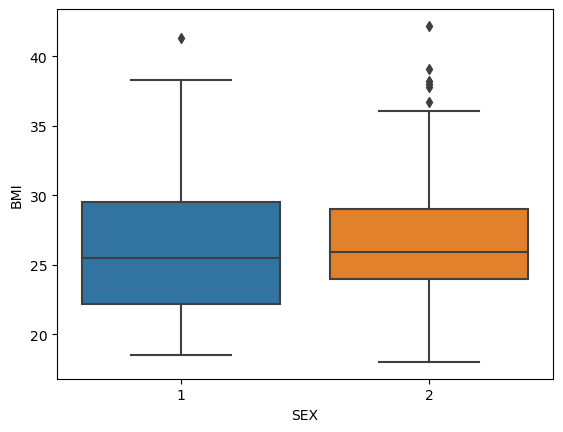

In [6]:
#Nilai rata2 BMI yang banyak
sns.boxplot(data=data,x='SEX',y='BMI')

<AxesSubplot:xlabel='count', ylabel='SEX'>

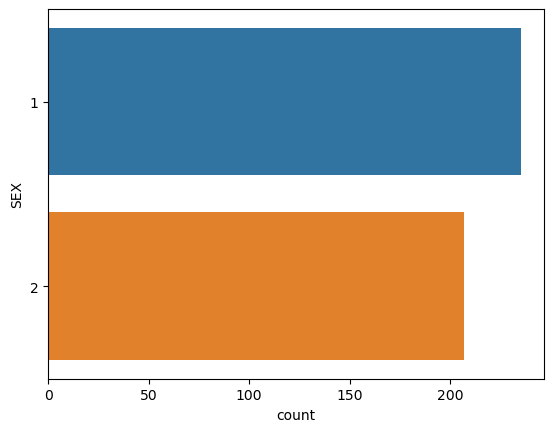

In [7]:
#Berapa jumlah pria dan wanita
sns.countplot(data=data,y='SEX')

# ML

In [8]:
X = data.drop(columns='Y')
y = data['Y']

In [10]:
# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1)
# model.fit(X,y)
model.fit(X,y)

RandomForestRegressor(random_state=1)

In [11]:
# PREDIKSI

Xt = X[:20]

prediksi = model.predict(Xt)

Text(0.5, 1.0, 'Random Forest Regressor')

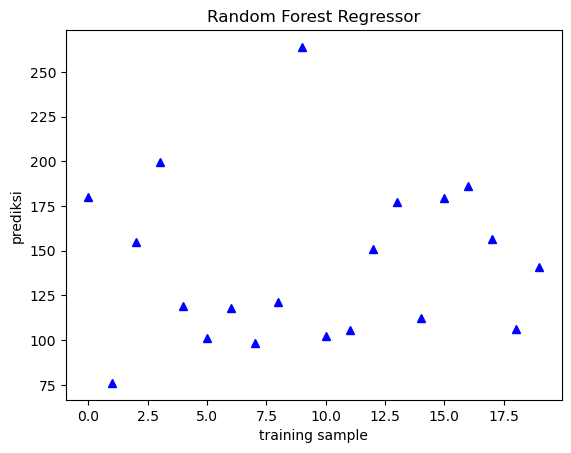

In [18]:

plt.plot(prediksi,'b^',label="RandomForestRegressor")
plt.ylabel("prediksi")
plt.xlabel("training sample")
plt.title("Random Forest Regressor")

In [13]:
prediksi

array([180.25,  76.06, 155.07, 199.9 , 119.11, 101.41, 117.85,  98.56,
       121.37, 263.99, 102.32, 105.91, 150.84, 177.03, 112.22, 179.49,
       185.95, 156.78, 105.96, 140.63])

In [ ]:
import numpy as np
y = np.array(y)
y=y[:20]

In [16]:
# EVAL

from sklearn import metrics
def nilai(real_value,predict):
    nilai_r2 = metrics.r2_score(real_value,predict)
    nilai_mae = metrics.mean_squared_error(real_value,predict) 
    nilai_mse =metrics.mean_absolute_error(real_value,predict)
    nilai_rmse = np.sqrt(metrics.mean_squared_error(real_value,predict))
    # return nilai_r2,nilai_mae,nilai_mse,nilai_rmse
    datafrem = pd.DataFrame({'r2 square':[nilai_r2],'MAE':[nilai_mae],'MSE':[nilai_mse],'RMSE':[nilai_rmse]})
    return datafrem
nilai(y,prediksi)

,r2 square,MAE,MSE,RMSE
0,0.852886,449.86746,17.078,21.210079
